In [73]:
from pydataset import data
from sklearn.feature_selection import SelectKBest, f_regression, RFE
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
import sklearn.preprocessing
import matplotlib.pyplot as plt

# Exercises

## Load the tips dataset.

In [19]:
tips = data('tips')
tips.head()

,total_bill,tip,sex,smoker,day,time,size
1,16.99,1.01,Female,No,Sun,Dinner,2
2,10.34,1.66,Male,No,Sun,Dinner,3
3,21.01,3.50,Male,No,Sun,Dinner,3
4,23.68,3.31,Male,No,Sun,Dinner,2
5,24.59,3.61,Female,No,Sun,Dinner,4


### Create a column named price_per_person. This should be the total bill divided by the party size.

In [20]:
tips['price_per_person'] = round(tips['total_bill']/tips['size'],2)
tips.head()

,total_bill,tip,sex,smoker,day,time,size,price_per_person
1,16.99,1.01,Female,No,Sun,Dinner,2,8.49
2,10.34,1.66,Male,No,Sun,Dinner,3,3.45
3,21.01,3.50,Male,No,Sun,Dinner,3,7.00
4,23.68,3.31,Male,No,Sun,Dinner,2,11.84
5,24.59,3.61,Female,No,Sun,Dinner,4,6.15


In [21]:
tips.dtypes

total_bill          float64
tip                 float64
sex                  object
smoker               object
day                  object
time                 object
size                  int64
price_per_person    float64
dtype: object

In [34]:
# encoding objects to integers
tips['sex'] = tips['sex'].map({'Female': 0, 'Male': 1})
tips['smoker'] = tips['smoker'].map({'No': 0, 'Yes': 1})
tips['time'] = tips['time'].map({'Lunch': 0, 'Dinner': 1})
tips['day'] = tips['day'].map({'Thur': 0, 'Fri': 1, 'Sat': 2, 'Sun': 3})

In [35]:
tips

,total_bill,tip,sex,smoker,day,time,size,price_per_person
1,16.99,1.01,0,0,3,1,2,8.49
2,10.34,1.66,1,0,3,1,3,3.45
3,21.01,3.50,1,0,3,1,3,7.00
4,23.68,3.31,1,0,3,1,2,11.84
5,24.59,3.61,0,0,3,1,4,6.15
...,...,...,...,...,...,...,...,...
240,29.03,5.92,1,0,2,1,3,9.68
241,27.18,2.00,0,1,2,1,2,13.59
242,22.67,2.00,1,1,2,1,2,11.34
243,17.82,1.75,1,0,2,1,2,8.91


In [38]:
train_and_validate, test = train_test_split(tips, random_state=117)
train, validate = train_test_split(train_and_validate)
x_train = train.drop(columns='tip')
y_train = train['tip']
x_validate = validate.drop(columns='tip')
y_validate = validate['tip']
x_test = test.drop(columns='tip')
y_test = test['tip']

### Before using any of the methods discussed in the lesson, which features do you think would be most important for predicting the tip amount?

#### Initial thoughts are that total bill and time of day are the strongest features.

### Use Select K Best to select the top 2 features for predicting tip amount. What are they?

In [40]:
f_selector = SelectKBest(f_regression, k=2)
f_selector.fit(x_train, y_train)
feature_mask = f_selector.get_support()
f_feature = x_train.iloc[:,feature_mask].columns.tolist()
f_feature

['total_bill', 'size']

#### Total Bill and Size are the top 2 predictive features

### Use Recursive Feature Elimination to select the top 2 features for tip amount. What are they?

In [44]:
lr = LinearRegression()
rfe = RFE(lr, n_features_to_select=2)
rfe.fit(x_train, y_train)
feature_mask = rfe.support_
rfe_feature = x_train.iloc[:,feature_mask].columns.tolist()
rfe_feature

['smoker', 'size']

#### Smoker and size are the top 2 features for RFE.

### Why do you think Select K Best and Recursive Feature Elimination might give different answers for the top features? Does this change as you change the number of features you are selecting?

In [48]:
f_selector = SelectKBest(f_regression, k=5)
f_selector.fit(x_train, y_train)
feature_mask = f_selector.get_support()
f_feature = x_train.iloc[:,feature_mask].columns.tolist()
f_feature

['total_bill', 'sex', 'day', 'size', 'price_per_person']

In [47]:
lr = LinearRegression()
rfe = RFE(lr, n_features_to_select=5)
rfe.fit(x_train, y_train)
feature_mask = rfe.support_
rfe_feature = x_train.iloc[:,feature_mask].columns.tolist()
rfe_feature

['total_bill', 'smoker', 'day', 'time', 'size']

#### Even after changing the amount of features to 5, we are still getting differenct results. This is likely due to the fact that Select K best will remove features if they are highly correlated to one another, potentially removing key features that RFE wouldn't.

## Write a function named select_kbest that takes in the predictors (X), the target (y), and the number of features to select (k) and returns the names of the top k selected features based on the SelectKBest class. Test your function with the tips dataset. You should see the same results as when you did the process manually.

In [66]:
def select_kbest(X, y, k):
    '''
    select_kbest will take three arguments: X(our split dataframe. Example: x_train), y(our target from the split data. Example: y_train), and k(the amount of features we want identified)
    and will return the k best features using SelectKBest.
    '''
    f_selector = SelectKBest(f_regression, k=k)
    f_selector.fit(X, y)
    feature_mask = f_selector.get_support()
    f_feature = X.iloc[:,feature_mask].columns.tolist()
    return f_feature

In [51]:
new_tips = data('tips')
new_tips['price_per_person'] = round(new_tips['total_bill']/new_tips['size'],2)

new_tips['sex'] = new_tips['sex'].map({'Female': 0, 'Male': 1})
new_tips['smoker'] = new_tips['smoker'].map({'No': 0, 'Yes': 1})
new_tips['time'] = new_tips['time'].map({'Lunch': 0, 'Dinner': 1})
new_tips['day'] = new_tips['day'].map({'Thur': 0, 'Fri': 1, 'Sat': 2, 'Sun': 3})

train_and_validate, test = train_test_split(new_tips, random_state=117)
train, validate = train_test_split(train_and_validate)
x_train = train.drop(columns='tip')
y_train = train['tip']
x_validate = validate.drop(columns='tip')
y_validate = validate['tip']
x_test = test.drop(columns='tip')
y_test = test['tip']

In [53]:
# testing function on freshly acquired data
select_kbest(x_train, y_train, 3)

['total_bill', 'size', 'price_per_person']

## Write a function named rfe that takes in the predictors, the target, and the number of features to select. It should return the top n features based on the RFE class. Test your function with the tips dataset. You should see the same results as when you did the process manually.

In [67]:
def rfe(X, y, k):
    '''
    select_kbest will take three arguments: X(our split dataframe. Example: x_train), y(our target from the split data. Example: y_train), and k(the amount of features we want identified)
    and will return the k best features using RFE.
    '''
    lr = LinearRegression()
    rfe = RFE(lr, n_features_to_select=k)
    rfe.fit(X, y)
    feature_mask = rfe.support_
    rfe_feature = X.iloc[:,feature_mask].columns.tolist()
    return rfe_feature

In [55]:
new_tips2 = data('tips')
new_tips2['price_per_person'] = round(new_tips2['total_bill']/new_tips2['size'],2)

new_tips2['sex'] = new_tips2['sex'].map({'Female': 0, 'Male': 1})
new_tips2['smoker'] = new_tips2['smoker'].map({'No': 0, 'Yes': 1})
new_tips2['time'] = new_tips2['time'].map({'Lunch': 0, 'Dinner': 1})
new_tips2['day'] = new_tips2['day'].map({'Thur': 0, 'Fri': 1, 'Sat': 2, 'Sun': 3})

train_and_validate, test = train_test_split(new_tips2, random_state=117)
train, validate = train_test_split(train_and_validate)
x_train = train.drop(columns='tip')
y_train = train['tip']
x_validate = validate.drop(columns='tip')
y_validate = validate['tip']
x_test = test.drop(columns='tip')
y_test = test['tip']

In [59]:
rfe(x_train, y_train, 3)

['smoker', 'size', 'price_per_person']

## Load the swiss dataset and use all the other features to predict Fertility. Find the top 3 features using both Select K Best and Recursive Feature Elimination (use the functions you just built to help you out).

In [61]:
swiss = data('swiss')
swiss.head()

,Fertility,Agriculture,Examination,Education,Catholic,Infant.Mortality
Courtelary,80.2,17.0,15,12,9.96,22.2
Delemont,83.1,45.1,6,9,84.84,22.2
Franches-Mnt,92.5,39.7,5,5,93.40,20.2
Moutier,85.8,36.5,12,7,33.77,20.3
Neuveville,76.9,43.5,17,15,5.16,20.6


In [63]:
train_and_validate, test = train_test_split(swiss, random_state=117)
train, validate = train_test_split(train_and_validate)
x_train = train.drop(columns='Fertility')
y_train = train['Fertility']
x_validate = validate.drop(columns='Fertility')
y_validate = validate['Fertility']
x_test = test.drop(columns='Fertility')
y_test = test['Fertility']

In [64]:
select_kbest(x_train, y_train, 3)

['Examination', 'Education', 'Infant.Mortality']

In [65]:
rfe(x_train, y_train, 3)

['Examination', 'Education', 'Infant.Mortality']

# Scaled Data

In [70]:
# Scaled data
scaled_tips = data('tips')
scaled_tips['price_per_person'] = round(scaled_tips['total_bill']/scaled_tips['size'],2)

scaled_tips['sex'] = scaled_tips['sex'].map({'Female': 0, 'Male': 1})
scaled_tips['smoker'] = scaled_tips['smoker'].map({'No': 0, 'Yes': 1})
scaled_tips['time'] = scaled_tips['time'].map({'Lunch': 0, 'Dinner': 1})
scaled_tips['day'] = scaled_tips['day'].map({'Thur': 0, 'Fri': 1, 'Sat': 2, 'Sun': 3})

train_and_validate, test = train_test_split(scaled_tips, random_state=117)
train, validate = train_test_split(train_and_validate)
x_train = train.drop(columns='tip')
y_train = train['tip']

In [71]:
scaler = sklearn.preprocessing.MinMaxScaler()
scaler.fit(x_train)
x_train_scaled = scaler.transform(x_train)

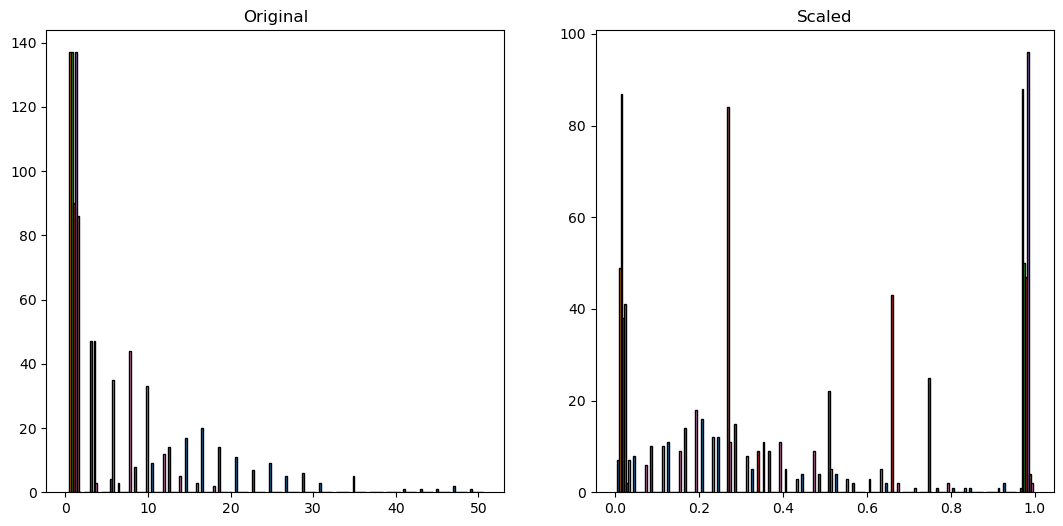

In [74]:
plt.figure(figsize=(13, 6))
plt.subplot(121)
plt.hist(x_train, bins=25, ec='black')
plt.title('Original')
plt.subplot(122)
plt.hist(x_train_scaled, bins=25, ec='black')
plt.title('Scaled')
plt.show()

In [75]:
scaler = sklearn.preprocessing.StandardScaler()
scaler.fit(x_train)
x_train_scaled = scaler.transform(x_train)

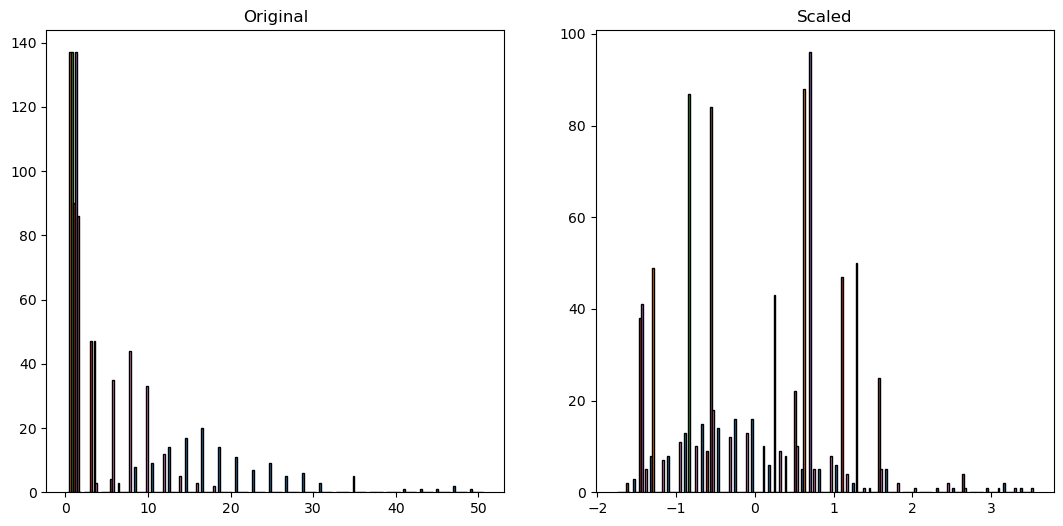

In [76]:
plt.figure(figsize=(13, 6))
plt.subplot(121)
plt.hist(x_train, bins=25, ec='black')
plt.title('Original')
plt.subplot(122)
plt.hist(x_train_scaled, bins=25, ec='black')
plt.title('Scaled')
plt.show()

In [77]:
scaler = sklearn.preprocessing.RobustScaler()
scaler.fit(x_train)
x_train_scaled = scaler.transform(x_train)

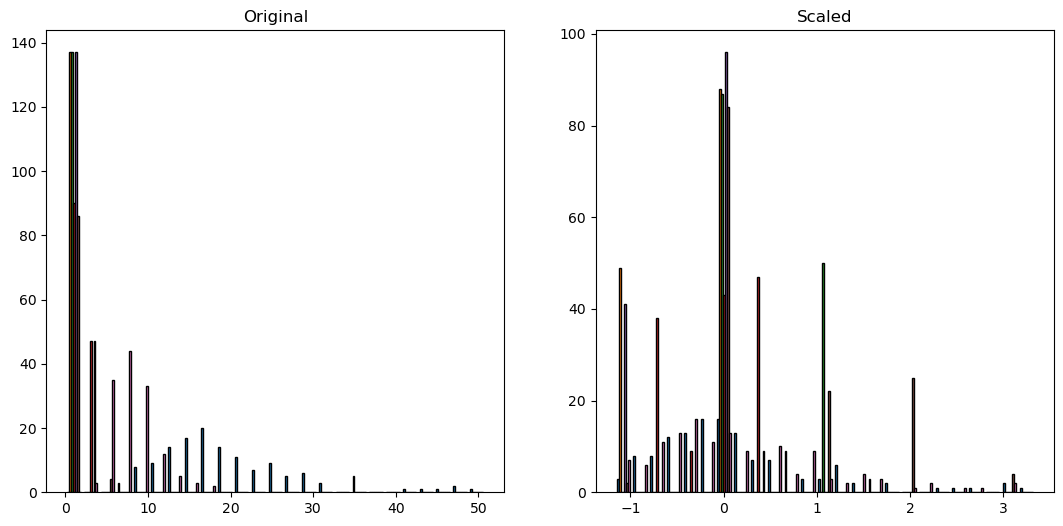

In [78]:
plt.figure(figsize=(13, 6))
plt.subplot(121)
plt.hist(x_train, bins=25, ec='black')
plt.title('Original')
plt.subplot(122)
plt.hist(x_train_scaled, bins=25, ec='black')
plt.title('Scaled')
plt.show()

### We'll go with the robust scaler.

In [79]:
select_kbest(x_train_scaled, y_train, 3)

AttributeError: 'numpy.ndarray' object has no attribute 'iloc'

In [94]:
f_selector = SelectKBest(f_regression, k=k)
f_selector.fit(X, y)
feature_mask = f_selector.get_support()
f_feature = X.columns[feature_mask].tolist()
f_feature

NameError: name 'k' is not defined

In [93]:
f_selector = SelectKBest(f_regression, k=2)
f_selector.fit(x_train_scaled, y_train)
feature_mask = f_selector.get_support()
f_columns = x_train.columns[feature_mask].tolist()
f_columns

['total_bill', 'size']

In [80]:
rfe(x_train_scaled, y_train, 3)

AttributeError: 'numpy.ndarray' object has no attribute 'iloc'

In [ ]:
f_selector = SelectKBest(f_regression, k=2)
f_selector.fit(x_train_scaled, y_train)
feature_mask = f_selector.get_support()
rfe_columns = x_train.columns[rfe.support_].tolist()
rfe_columns